# Numerical Optimization (CS215300) Assignment 2
## Introduction
In this assignment, we expect you to be familiar with the Pytorch optimizer library. We are using the Rosenbrock function as the benchmark of our optimization algorithms again. Since this is a simple test on very small scale, CUDA is not needed. You need to install Pytorch to acquire the pre-defined optimizers.  
The library document link: https://pytorch.org/docs/stable/optim.html

## Task
1. Please try different optimizers and observe the behavior of them, and try different hyperparameters and observe if they behave differently. (In case of L-BFGS, the parameters wrapped in this sample code won't work. If you want to try it anyway, you will need to write your own code.)
2. Whether if your setting converges or not, please justify it by experiment or your hyperthesis.
3. Please answer the following question in your report:  
    (a) What is the relation between SGD and GD(gradient descent) in our case, i.e. when the input is one-dimensional?  
    (b) Have you found effective way to set hyperparameters so they can iterate faster toward the minimum point?
4. Please write a concise report about your experiments and analysis. If you need to plot tables, please check the following link: https://www.tablesgenerator.com/markdown_tables

##  Advanced Technique: Learning rate scheduler
Another technique to find hyperparameter for learning rate is to perform scheduled adjestments of learning rate. This is called 'learning rate scheduler'. The adjestments here not only affected by current learning rate and momentum etc., but also the epoch number or step numbers. Usually, in these kind of method, we are presuming the optimal hyperparameters can be found by recognizing certain patterns, and we schedule the experiments to search the proper parameters in such manner. You can also apply these function in your code. The library document of learning rate scheduler is in the same link above.



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.optim as optim

In [2]:
def rosenbrock(tensor):
    x, y = tensor
    return (1 - x) ** 2 + 100 * (y - x ** 2) ** 2

def execute_steps(func, initial_state, optimizer_class, optimizer_config, num_iter=500):
    x = torch.Tensor(initial_state).requires_grad_(True)
    optimizer = optimizer_class([x], **optimizer_config)
    steps = []
    steps = np.zeros((2, num_iter))
    steps[:, 0] = np.array(initial_state)
    for i in range(0, num_iter):
        optimizer.zero_grad()
        f = func(x)
        f.backward(create_graph=True, retain_graph=True)
        torch.nn.utils.clip_grad_norm_(x, 1.0)
        optimizer.step()
        steps[:, i] = x.detach().numpy()
    return steps

def plot_rosenbrok(grad_iter, optimizer_name):
    x = np.linspace(-2, 2, 250)
    y = np.linspace(-1, 3, 250)
    minimum = (1.0, 1.0)

    X, Y = np.meshgrid(x, y)
    Z = rosenbrock([X, Y])

    iter_x, iter_y = grad_iter[0, :], grad_iter[1, :]

    fig = plt.figure(figsize=(8, 8))

    ax = fig.add_subplot(1, 1, 1)
    ax.contour(X, Y, Z, 90, cmap='jet')
    ax.plot(iter_x, iter_y, color='r', marker='x')

    ax.set_title('{} with {} iterations'.format(optimizer_name, len(iter_x)))
    plt.plot(*minimum, 'gD')
    plt.plot(iter_x[-1], iter_y[-1], 'rD')
    plt.show()

In [3]:
def printX(steps):
    iter_x, iter_y = steps[0, :], steps[1, :]
    i= 0
    for x,y in zip(iter_x,iter_y):
        print("iteration %d: [%.4f %.4f]" %(i,x,y))
        i+=1

In [101]:
initial_state = np.array([-2,2])
def experiment(optimizer, hyperparameters, iters):
    steps = execute_steps(
        rosenbrock,
        initial_state,
        optimizer,
        hyperparameters,
        num_iter = iters
    )
    plot_rosenbrok(steps, optimizer.__name__)
    return steps

# 1. SGD

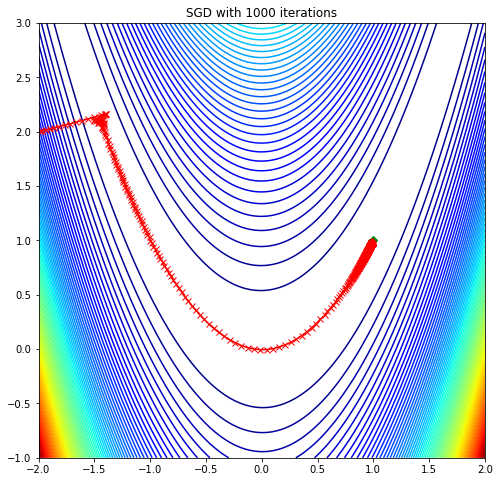

SGD last step: [0.9880664348602295,0.9860190153121948]


In [137]:
sgd_steps = experiment(
  optimizer = optim.SGD, 
  hyperparameters = {
    'lr':0.0125, 
    'momentum':0.8, 
    'weight_decay': 0.001}, 
  iters = 1000
)
print(f"SGD last step: [{sgd_steps[0][-1]},{sgd_steps[1][-1]}]")

# 2. Adadelta

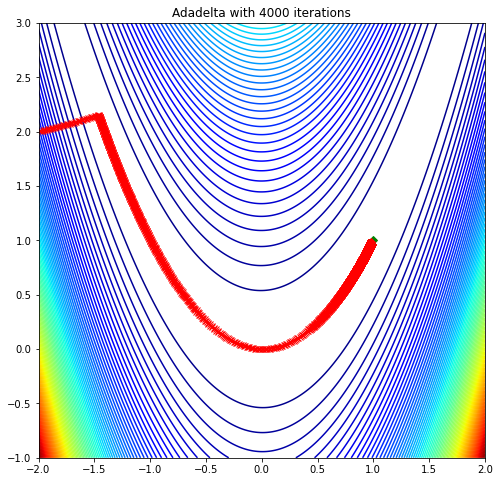

Adadelta last step: [0.9814918637275696,0.9885281920433044]


In [135]:
adadelta_steps = experiment(
  optimizer = optim.Adadelta,
  hyperparameters= {
    'rho': 1,
    'eps': 0.001,
    'lr': 0.0125,
    'weight_decay': 0.001
  },
  iters = 4000
)
print(f"Adadelta last step: [{adadelta_steps[0][-1]},{adadelta_steps[1][-1]}]")

Adadelta last step: [0.9803232550621033,0.9807828664779663]


# 3. ASGD 

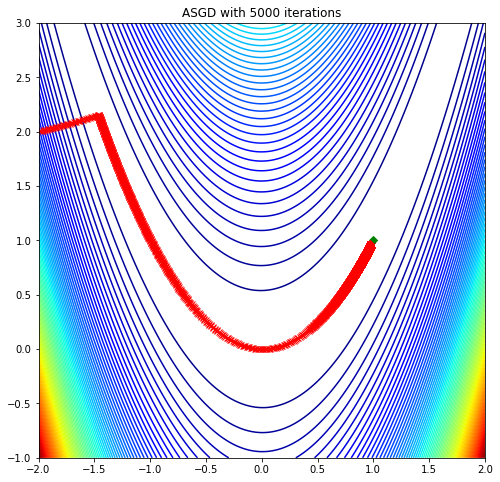

ASGD last step: [0.9733821153640747,0.9648940563201904]


In [131]:
asgd_steps = experiment(
  optimizer = optim.ASGD, 
  hyperparameters = {
    'lr':0.0125,
    'lambd': 1e-4,
    'alpha': 0.75,
    'weight_decay': 0
  }, 
  iters = 5000
)
print(f"ASGD last step: [{asgd_steps[0][-1]},{asgd_steps[1][-1]}]")

# 4. Adagrad

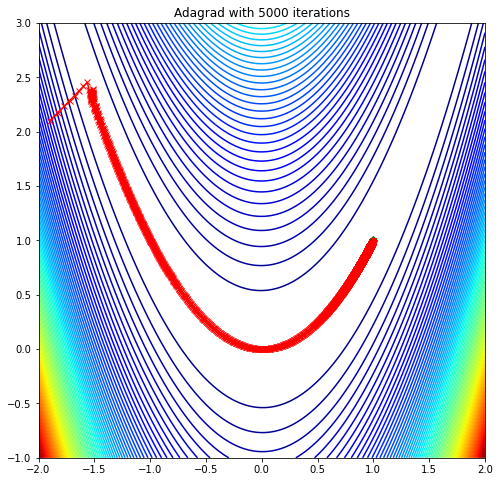

Adagrad last step: [0.9981511831283569,0.9962970018386841]


In [138]:
adagrad_steps = experiment(
  optimizer = optim.Adagrad, 
  hyperparameters = {
    'lr':0.1,
    'lr_decay': 0,
    'eps': 1e-10,
    'weight_decay': 0
  }, 
  iters = 5000
)
print(f"Adagrad last step: [{adagrad_steps[0][-1]},{adagrad_steps[1][-1]}]")

# 5. Adam

In [ ]:
adam_steps = experiment(
  optimizer = optim.Adam, 
  hyperparameters = {
    'lr':0.1,
    'weight_decay': 0
  }, 
  iters = 5000
)
print(f"Adam last step: [{adam_steps[0][-1]},{adam_steps[1][-1]}]")

# 6. Adamw

In [ ]:
adamw_steps = experiment(
  optimizer = optim.AdamW, 
  hyperparameters = {
    'lr':0.1,
    'weight_decay': 0
  }, 
  iters = 5000
)
print(f"Adamw last step: [{adamw_steps[0][-1]},{adamw_steps[1][-1]}]")

# 7. Sparse Adam

In [ ]:
sparse_adam_steps = experiment(
  optimizer = optim.SparseAdam, 
  hyperparameters = {
    'lr':0.1,
    'weight_decay': 0
  }, 
  iters = 5000
)
print(f"Sparse Adam last step: [{sparse_adam_steps[0][-1]},{sparse_adam_steps[1][-1]}]")

# 8. NAdam

In [ ]:
nadam_steps = experiment(
  optimizer = optim.NAdam, 
  hyperparameters = {
    'lr':0.1,
    'weight_decay': 0
  }, 
  iters = 5000
)
print(f"NAdam last step: [{nadam_steps[0][-1]},{nadam_steps[1][-1]}]")

# 9. Adamax

In [ ]:
adamax_steps = experiment(
  optimizer = optim.Adamax, 
  hyperparameters = {
    'lr':0.1,
    'lr_decay': 0,
    'eps': 1e-10,
    'weight_decay': 0
  }, 
  iters = 2000
)
print(f"Adamax last step: [{adamax_steps[0][-1]},{adamax_steps[1][-1]}]")

# 10. RMSprop

In [ ]:
rmsprop_steps = experiment(
  optimizer = optim.RMSprop, 
  hyperparameters = {
    'lr':0.1,
    'weight_decay': 0
  }, 
  iters = 2000
)
print(f"RMSprop last step: [{rmsprop_steps[0][-1]},{rmsprop_steps[1][-1]}]")

# 11. Rprop

In [ ]:
rprop_steps = experiment(
  optimizer = optim.Rprop, 
  hyperparameters = {
    'lr':0.1,
    'weight_decay': 0
  }, 
  iters = 2000
)
print(f"Rprop last step: [{rprop_steps[0][-1]},{rprop_steps[1][-1]}]")

# 12. LBFGS

## Report

# SGD & GD

![Stochastic Gradient Descent and Gradient Descent Algorithms](./sgd_vs_gd.png "Stocastic Gradient Descent and Gradient Descent Algorithms")

In this case, our SGD requires more iterations to converge, as oppose to GD which only requires as shown the figure below. ![Gradient Descent Converging Figure](./gd.png "Gradient Descent Algorithm")

1. What is the relation between SGD and GD in our case, i.e. when the input is one-dimensional?  

In this observation, I found that SGD requires higher learning and more iterations to converge compared to GD. While GD requires a way smaller less learning rate and less iterations to converge.

Even though Stochastic Gradient Descent algorithm requires more iterations to converge, a small set of data points randomly picked from the dataset is considered in each iteration. Though smaller data points won't take us to the converging point, at least it can help us approximate its gradient in a short period of time. Not only that, it doesn't suffer overfitting since SGD won't approximate really well given the number of data points considered.

As for the Gradient Descent algorithm, its gradient is updated once all the data points in a certain dataset are considered. Even though Gradient Descent guarantees converging, it takes a significant amount of time if the number of data points is siginificant enough, unlike SGD which requires a small amount of data points to update its gradient. Not only it takes a significant amount of time to converge, it might suffer overfitting since GD approximates very well and real world data is full of uncertainties.

Thus Algorithm like Stochastic Gradient Descent is more suitable in uncertain conditions compared to Gradient Descent.

!["SGD and GD Comparison"](./gd_graph.png "SGD and GD Comparison")

2. Have you found effective way to set hyperparameters so they can iterate faster toward the minimum point?
* In this case, in order for SGD to converge way faster than GD, I set the learning rate to be $0.0125$, the momentum $0.9$, and the weight decay $0$.